<div>
<img src="https://www.ul.ie/themes/custom/ul/logo.jpg" width="350"/>
</div> 

# **Artificial Intelligence - MSc**

## CS6462 - PROBABILISTIC AND EXPLAINABLE AI 
## SEM2 2022/3

### CS6462 Etivity 3 - Causal Graphical Model vs Bayesian Graphical Model

### Instructor: Emil Vassev
April 10th, 2023
<br><br>
Copyright (C) 2023 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: Siddharth
### Student Surname: Prince
### Student ID: 23052058
### Date of Final Submission: 28/04/2024
***

## Task
In this e-tivity, you are asked to build a Causal Graphical Model by using the <b>causalgraphicalmodels</b> library and do interventions on this model. Then you are asked to build the same model but as a Bayesian Network by using the <b>BayesianNetwork</b> construct of the <b>pgmpy.models</b> library. Both models need to cover a real-life scenario targeting getting late at work. 

## The real-life scenario

Here, you can find a set of random variables X = {X1, X2, ... , X12}:
<li>X1 = “late for work”</li> 
<li>X2 = “low speed due to long vehicle queues”</li> 
<li>X3 = “traffic jam”</li>
<li>X4 = “traffic accident”</li> 
<li>X5 = “heavy rain”</li>
<li>X6 = “snow”</li>
<li>X7 = “slippery road”</li> 
<li>X8 = “getting up late”</li>
<li>X9 = “road is blocked”</li>
<li>X10 = “taking a longer alternative route”</li> 
<li>X11 = “car malfunction”</li> 
<li>X12 = “car towing”</li> 

Use your logic to build a <b>realistic</b> causal network, which then can be transformed to a Bayesian Network (Causal Bayesian Network). In this network, the parent-child relationships should be deduced based on your logic. You need to use all the random variables.
    
### Here are the steps you need to follow:

## Step 1: Create and Execute the Causal Network (50%)

### Step 1.1. Describe your logic of deducing the causal relationships. (10%)
Outline the problem in terms of:
<li>causal dependencies among the random variables</li>
<li>short rationale on the parent-child relationships</li>    


Being late to work, X1 seems to be the scenario that all the other scenarios ultimately cause. So that should be the end node. The possible paths that lead to this with the other random variables (scenarios) are as follows;

- Traffic accident/jam scenario is when an accident causes an issue with the regular commute and slows one down by having to wait for the road to clear up or find an alternate (often sub-optimal) route.
    - **Scenario #1:** traffic accident (X4)/ traffic jam (X3) -> low speed due to long vehicle queues (X2) -> late for work (X1)
    - **Scenario #2:** traffic accident (X4) -> road is blocked (X9) -> taking a longer alternative route (X10) -> late for work (X1)
    - **Scenario #3:** traffic jam (X3) -> taking a longer alternative route (X10) -> late for work (X1)
- Inclement weather is a usual suspect in making one late to work. 
    - **Scenario #4:** heavy rain (X5)/ snow (X6) -> slippery road (X7) -> low speed due to long vehicle queues (X2) -> late for work (X1)
    - **Scenario #5:** snow (X6) -> road is blocked (X9) -> taking a longer alternative route (X10) -> late for work (X1)
- A self explanatory scenario is if you're late to start your day, you are probably going to be late to work.
    - **Scenario #6:** getting up late (X8) -> late for work (X1)
- If you are dependent on your car for your commute and it breaks down, you're most definitely going to end up late while     you need to take care of the car and find alternate methods of transport.
    - **Scenario #7:** car malfunction (X11) -> car towing (X12) -> late for work (X1)

### Step 1.2: Create and show the Causal DAG (30%)

In [1]:
# To workaround the import error as suggested from the forum thread
import collections.abc
collections.Iterable = collections.abc.Iterable
from collections.abc import Iterable

In [2]:
from causalgraphicalmodels import CausalGraphicalModel
lateToWork = CausalGraphicalModel(
    nodes=['late for work','low speed due to long vehicle queues','traffic jam','traffic accident','heavy rain','snow',
           'slippery road','getting up late','road is blocked','taking a longer alternative route','car malfunction','car towing'],
    edges=[
        ('traffic accident', 'low speed due to long vehicle queues'), ('traffic jam', 'low speed due to long vehicle queues'), ('low speed due to long vehicle queues', 'late for work'), # Scenario #1
        ('traffic accident', 'road is blocked'), ('snow', 'road is blocked'), ('road is blocked', 'taking a longer alternative route'), ('traffic jam', 'taking a longer alternative route'), ('taking a longer alternative route', 'late for work'), # Scenario #2, #3 & #5
        ('heavy rain', 'slippery road'), ('snow', 'slippery road'), ('slippery road', 'low speed due to long vehicle queues'), ('low speed due to long vehicle queues', 'late for work'), # Scenario #4
        ('getting up late', 'late for work'), # Scenario #5
        ('car malfunction', 'car towing'), ('car towing', 'late for work') # Scenario #6
    ]
)

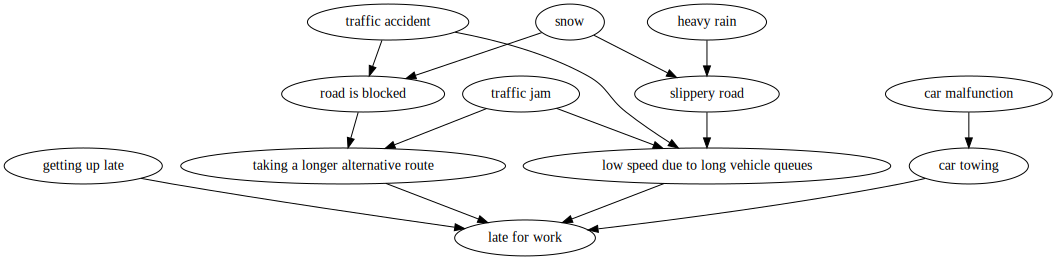

In [3]:
# Plotting the causal DAG
lateToWork.draw()

The above DAG has all the scenarios spelt out. Let's create another causal graph model with all the corresponding X variables names so that it is represented concisely which we will use from here on out.

In [4]:
edges=[
        ('X4', 'X2'), ('X3', 'X2'), ('X2', 'X1'), # Scenario #1
        ('X4', 'X9'), ('X6', 'X9'), ('X9', 'X10'), ('X3', 'X10'), ('X10', 'X1'), # Scenario #2, #3 & #5
        ('X5', 'X7'), ('X6', 'X7'), ('X7', 'X2'), ('X2', 'X1'), # Scenario #4
        ('X8', 'X1'), # Scenario #6
        ('X11', 'X12'), ('X12', 'X1') # Scenario #7
    ]
lateToWorkX = CausalGraphicalModel(
    nodes=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12'],
    edges=edges
)

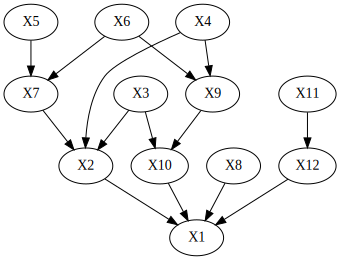

In [5]:
# Plotting the causal DAG
lateToWorkX.draw()

### Step 1.3: Show the Joint Distibution of the Causal Network (1%)

In [6]:
print(lateToWorkX.get_distribution())

P(X3)P(X4)P(X5)P(X6)P(X8)P(X11)P(X9|X4,X6)P(X7|X5,X6)P(X12|X11)P(X10|X9,X3)P(X2|X4,X3,X7)P(X1|X2,X10,X8,X12)


### Step 1.4: Run the intervention do(“road is blocked”) (7%)

In [7]:
# Running the intervention do("road is blocked")
x9_do = lateToWorkX.do('X9') # X9 = road is blocked
x9_do

CausalGraphicalModel(X1, X10, X11, X12, X2, X3, X4, X5, X6, X7, X8, X9)

### Step 1.5: Show the Causal DAG with the intervention "on" (1%)

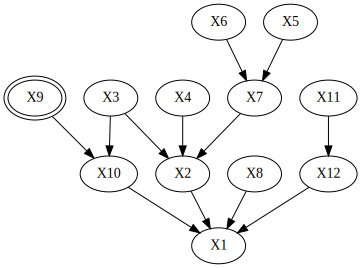

In [8]:
# Showing the causal DAG with the intervention 'on'
x9_do.draw()

### Step 1.6: Show the Joint Distibution of the Causal Network with the intervention "on" (1%)

In [9]:
# Joint distribution of the causal network with the interventionof X9 'on'
print(x9_do.get_distribution())

P(X3)P(X6)P(X4)P(X8)P(X11)P(X5)P(X12|X11)P(X10|X3,do(X9))P(X7|X5,X6)P(X2|X3,X4,X7)P(X1|X2,X8,X10,X12)


***
## Note
In <b>Step 2</b> you need to transform the model, you have built in Step 1, to a Bayesian Network. Here, you will need to repeat some of the activities you have already done in E-tivity 2. Please, consider all the random variables <b>X</b> binary and the probability distribution of each variable as <b>{true=50%, false=50%}</b>. 
***

## Step 2: Create and Execute the Bayesian Network (50%)

### Step 2.1: Create and show the DAG of the Bayesian Network (20%)

#### Creating a Bayesian Network

In [10]:
# use the pgmpy library: "from pgmpy.models import BayesianNetwork"
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

model = BayesianNetwork(edges) # using the same edges defined in the causal network above

In [11]:
model.nodes()

NodeView(('X4', 'X2', 'X3', 'X1', 'X9', 'X6', 'X10', 'X5', 'X7', 'X8', 'X11', 'X12'))

In [12]:
model.edges()

OutEdgeView([('X4', 'X2'), ('X4', 'X9'), ('X2', 'X1'), ('X3', 'X2'), ('X3', 'X10'), ('X9', 'X10'), ('X6', 'X9'), ('X6', 'X7'), ('X10', 'X1'), ('X5', 'X7'), ('X7', 'X2'), ('X8', 'X1'), ('X11', 'X12'), ('X12', 'X1')])

#### Creating the DAG of the Bayesian Network

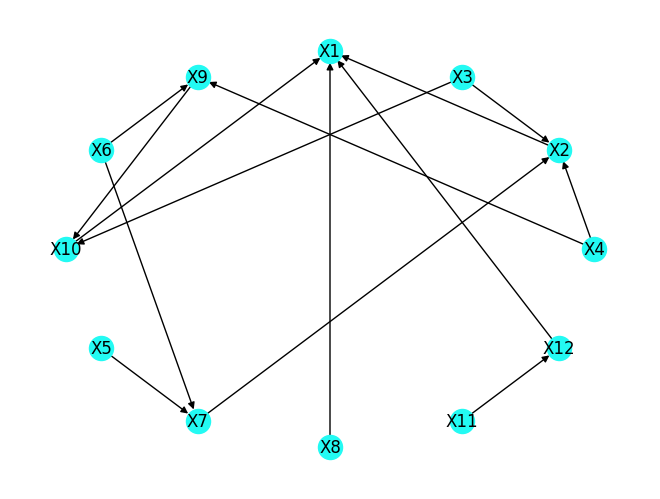

In [13]:
pos = nx.circular_layout(model)
nx.draw(model, pos=pos, with_labels=True, node_color='#23faf3')
plt.show()

### Step 2.2: Create the Conditional Probability Distributions of the Bayesian Network (20%)

#### Step 2.2.1: Build the probability distribution tables with TabularCPD (16%)

Building CPD tables for independent variables **(X3, X4, X5, X6, X8, X11)** and direct one-to-one causal relationships **(X12)**.

In [14]:
# -----------------------------------------------------
# Independent variables
# -----------------------------------------------------
# define CPD for "traffic_jam" (X3)
cpd_x3 = TabularCPD (
    variable="X3",
    variable_card=2,
    values=[[0.5], [0.5]] # P(traffic_jam=True)=0.5, P(traffic_jam=False)=0.5
)

# define CPD for "traffic_accident" (X4)
cpd_x4 = TabularCPD (
    variable="X4",
    variable_card=2,
    values=[[0.5], [0.5]] # P(traffic_accident=True)=0.5, P(traffic_accident=False)=0.5
)

# define CPD for "heavy_rain" (X5)
cpd_x5 = TabularCPD (
    variable="X5",
    variable_card=2,
    values=[[0.5], [0.5]] # P(heavy_rain=True)=0.5, P(heavy_rain=False)=0.5
)

# define CPD for "snow" (X6)
cpd_x6 = TabularCPD (
    variable="X6",
    variable_card=2,
    values=[[0.5], [0.5]] # P(snow=True)=0.5, P(snow=False)=0.5
)

# define CPD for "getting_up_late" (X8)
cpd_x8 = TabularCPD (
    variable="X8",
    variable_card=2,
    values=[[0.5], [0.5]] # P(getting_up_late=True)=0.5, P(getting_up_late=False)=0.5
)

# define CPD for "car_malfunction" (X11)
cpd_x11 = TabularCPD (
    variable="X11",
    variable_card=2,
    values=[[0.5], [0.5]] # P(car_malfunction=True)=0.5, P(car_malfunction=False)=0.5
)

# -----------------------------------------------------
# Variables with direct one-to-one causal realtionships
# -----------------------------------------------------
# define CPD for "car_towing" (X12)
cpd_x12 = TabularCPD (
    variable="X12",
    variable_card=2,
    values=[[0.5, 0.5], 
            [0.5, 0.5]], # P(car_malfunction=True|car_towing=True)=0.5, P(car_malfunction=False|car_towing=False)=0.5
    evidence=["X11"],
    evidence_card=[2]
)

Building CPD tables for dependent variables with many-to-one relationships **(X1, X2, X7, X9, X10)**

In [15]:
# -----------------------------------------------------
# Variables with many-to-one causal realtionships
# -----------------------------------------------------
# define CPD for "slippery_road" (X7)
cpd_x7 = TabularCPD (
    variable="X7",
    variable_card=2,

    # X5 = heavy_rain, X6 = snow
    # X7=True => {[X5=False, X6=False], [X5=True, X6=False], [X5=False, X6=True],[X5=True, X6=True]}
    # X7=False => {[X5=False, X6=False], [X5=True, X6=False], [X5=False, X6=True],[X5=True, X6=True]}
    # X7=True + X7=False = 1
    values=[[0.5, 0.5, 0.5, 0.5], # Having all probabilies 0.5 because that is what is asked for the task. 
            [0.5, 0.5, 0.5, 0.5]], # In reality this would have a distribution of the OR logic gate.

    # define the evidences - one of the causes must be true 
    evidence=["X5", "X6"],
    evidence_card=[2,2]
)

# define CPD for "slippery_road" (X9)
cpd_x9 = TabularCPD (
    variable="X9",
    variable_card=2,

    # X4 = traffic_accident, X6 = snow
    # X9=True => {[X4=False, X6=False], [X4=True, X6=False], [X4=False, X6=True],[X4=True, X6=True]}
    # X9=False => {[X4=False, X6=False], [X4=True, X6=False], [X4=False, X6=True],[X4=True, X6=True]}
    # X9=True + X9=False = 1
    values=[[0.5, 0.5, 0.5, 0.5], # Having all probabilies 0.5 because that is what is asked for the task. 
            [0.5, 0.5, 0.5, 0.5]], # 2^2 possible combinations

    # define the evidences - one of the causes must be true 
    evidence=["X4", "X6"],
    evidence_card=[2,2]
)

# define CPD for "taking_a_longer_alternate_route" (X10)
cpd_x10 = TabularCPD (
    variable="X10",
    variable_card=2,

    # X3 = traffic_jam, X9 = road_is_blocked
    # X10=True => {[X3=True, X9=False], [X3=True, X9=False], [X3=False, X9=True],[X3=True, X9=True]}
    # X10=False => {[X3=False, X9=False], [X3=True, X9=False], [X3=False, X9=True],[X3=True, X9=True]}
    # X10=True + X10=False = 1
    values=[[0.5, 0.5, 0.5, 0.5], # Having all probabilies 0.5 because that is what is asked for the task. 
            [0.5, 0.5, 0.5, 0.5]], # 2^2 possible combinations

    # define the evidences - one of the causes must be true 
    evidence=["X3", "X9"],
    evidence_card=[2,2]
)

# define CPD for "low_speed_due_to_long_vehicle_queues" (X2)
cpd_x2 = TabularCPD (
    variable="X2",
    variable_card=2,

    # X3 = traffic_jam, X4 = traffic_accident, X7 = slippery_road
    # X2=True  => {[X3=False, X4=False, X7=False], [X3=False, X4=False, X7=True], [X3=False, X4=True, X7=False],[X3=False, X4=True, X7=True], 
    #              [X3=True, X4=False, X7=False], [X3=True, X4=False, X7=True], [X3=True, X4=True, X7=False],[X3=True, X4=True, X7=True]}
    # X2=False => {[X3=False, X4=False, X7=False], [X3=False, X4=False, X7=True], [X3=False, X4=True, X7=False],[X3=False, X4=True, X7=True], 
    #              [X3=True, X4=False, X7=False], [X3=True, X4=False, X7=True], [X3=True, X4=True, X7=False],[X3=True, X4=True, X7=True]}
    # X2=True + X2=False = 1
    values=[[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], # Having all probabilies 0.5 because that is what is asked for the task. 
            [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], # 2^3 possible combinations

    # define the evidences - one of the causes must be true 
    evidence=["X3", "X4", "X7"],
    evidence_card=[2,2,2]
)

# define CPD for "late_for_work" (X1)
cpd_x1 = TabularCPD (
    variable="X1",
    variable_card=2,

    # X2 = low_speed_due_to_long_vehicle_queues, X8 = getting_up_late, X10 = taking_a_longer_alternate_route, X12 = car_towing
    # X1=True  => {[X2=False, X8=False, X10=False, X12=False], [X2=False, X8=False, X10=False, X12=True], [X2=False, X8=False, X10=True, X12=False], [X2=False, X8=False, X10=True, X12=True], 
    #              [X2=False, X8=True, X10=False, X12=False], [X2=False, X8=True, X10=False, X12=True], [X2=False, X8=True, X10=True, X12=False], [X2=False, X8=True, X10=True, X12=True], 
    #              [X2=True, X8=False, X10=False, X12=False], [X2=True, X8=False, X10=False, X12=True], [X2=True, X8=False, X10=True, X12=False],[X2=True, X8=False, X10=True, X12=True],
    #              [X2=True, X8=True, X10=False, X12=False], [X2=True, X8=True, X10=False, X12=True], [X2=True, X8=True, X10=True, X12=False],[X2=True, X8=True, X10=True, X12=True]}
    # X1=False => {[X2=False, X8=False, X10=False, X12=False], [X2=False, X8=False, X10=False, X12=True], [X2=False, X8=False, X10=True, X12=False], [X2=False, X8=False, X10=True, X12=True], 
    #              [X2=False, X8=True, X10=False, X12=False], [X2=False, X8=True, X10=False, X12=True], [X2=False, X8=True, X10=True, X12=False], [X2=False, X8=True, X10=True, X12=True], 
    #              [X2=True, X8=False, X10=False, X12=False], [X2=True, X8=False, X10=False, X12=True], [X2=True, X8=False, X10=True, X12=False],[X2=True, X8=False, X10=True, X12=True],
    #              [X2=True, X8=True, X10=False, X12=False], [X2=True, X8=True, X10=False, X12=True], [X2=True, X8=True, X10=True, X12=False],[X2=True, X8=True, X10=True, X12=True]}
    # X1=True + X1=False = 1
    values=[[0.5] * (2**4), # Having all probabilies 0.5 because that is what is asked for the task. 
            [0.5] * (2**4)], # 2^4 because there are 4 binary variables that X1 depends on.

    # define the evidences - one of the causes must be true 
    evidence=["X2", "X8", "X10", "X12"],
    evidence_card=[2,2,2,2]
)

#### Step 2.2.2: Associate the distribution models with the network structure (2%)

In [16]:
model.add_cpds(cpd_x1, cpd_x2, cpd_x3, cpd_x4, cpd_x5, cpd_x6, cpd_x7, cpd_x8, cpd_x9, cpd_x10, cpd_x11, cpd_x12)

#### Step 2.2.3: Check the model (2%)

In [17]:
model.check_model()

True

### Step 2.3: Infer Posterior Probability of “road is blocked” considering "late for work" as evidence. (10%)

In [18]:
# show the probability results
from pgmpy.inference import VariableElimination
 
infer = VariableElimination(model)

Evidence "late_for_work" can have two values of True/False. We shall infer the posterior probability for both cases of the evidence.

In [20]:
# posterior probability results for X1=True
# evidence={'X1': 1} means 'late_for_work' (X1) = True
posterior_p_x9_x1_true = infer.query(['X9'], evidence={'X1': 1}) # X9 = road_is_blocked
print(posterior_p_x9_x1_true)

+-------+-----------+
| X9    |   phi(X9) |
+=======+===========+
| X9(0) |    0.5000 |
+-------+-----------+
| X9(1) |    0.5000 |
+-------+-----------+


In [22]:
# posterior probability results for X1=False
# evidence={'X1': 0} means 'late_for_work' (X1) = False
posterior_p_x9_x1_false = infer.query(['X9'], evidence={'X1': 0}) # X9 = road_is_blocked
print(posterior_p_x9_x1_false)

+-------+-----------+
| X9    |   phi(X9) |
+=======+===========+
| X9(0) |    0.5000 |
+-------+-----------+
| X9(1) |    0.5000 |
+-------+-----------+


The posterior probabilities are all 0.5 above because we'd specified all binary probability distribution values to be 0.5.